# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### *Please read the instructions carefully before starting the project.*
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final presentation.


### Let us start by importing the required libraries

In [139]:
!pip3 install setuptools


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [140]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1


*Note*: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [141]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd


# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [142]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [143]:
# Read the data
df = pd.read_csv('foodhub_order.csv') ## Fill the blank to read the data

In [144]:
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


### *Question 1:* How many rows and columns are present in the data? [0.5 mark]

In [145]:
# Check the shape of the dataset
df.count()

order_id                 1898
customer_id              1898
restaurant_name          1898
cuisine_type             1898
cost_of_the_order        1898
day_of_the_week          1898
rating                   1898
food_preparation_time    1898
delivery_time            1898
dtype: int64

### *Question 2:* What are the datatypes of the different columns in the dataset? [0.5 mark]

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### *Question 3:* Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [147]:
# Checking for missing values in the data
df.isnull().sum()  #Write the appropriate function to print the sum of null values for each column

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

### *Question 4:* Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [148]:
# Get the summary statistics of the numerical data
pd.options.display.float_format = '{:.3f}'.format
df.describe() ## Write the appropriate function to print the statitical summary of the data (Hint - you have seen this in the case studies before)

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1898.000,1898.000,1898.000,1898.000,1898.000
mean,1477495.500,171168.478,16.499,27.372,24.162
std,548.050,113698.140,7.484,4.632,4.973
min,1476547.000,1311.000,4.470,20.000,15.000
25%,1477021.250,77787.750,12.080,23.000,20.000
50%,1477495.500,128600.000,14.140,27.000,25.000
75%,1477969.750,270525.000,22.297,31.000,28.000
max,1478444.000,405334.000,35.410,35.000,33.000


### *Question 5:* How many orders are not rated? [1 mark]

In [149]:
#How many orders are not rated
df['rating'].value_counts() ## Complete the code

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### *Question 6:* Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [150]:
# check unique order ID
df['order_id'].nunique()

1898

#### Customer ID

In [151]:
# check unique customer ID
df['customer_id'].nunique()  ## Complete the code to find out number of unique Customer ID

1200

#### Restaurant name

In [152]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  ## Complete the code to find out number of unique Restaurant Name

178

#### Cuisine type

In [153]:
# Check unique cuisine type
df['cuisine_type'].nunique() ## Complete the code to find out  number of  unique cuisine type

14

<Axes: xlabel='cuisine_type', ylabel='count'>

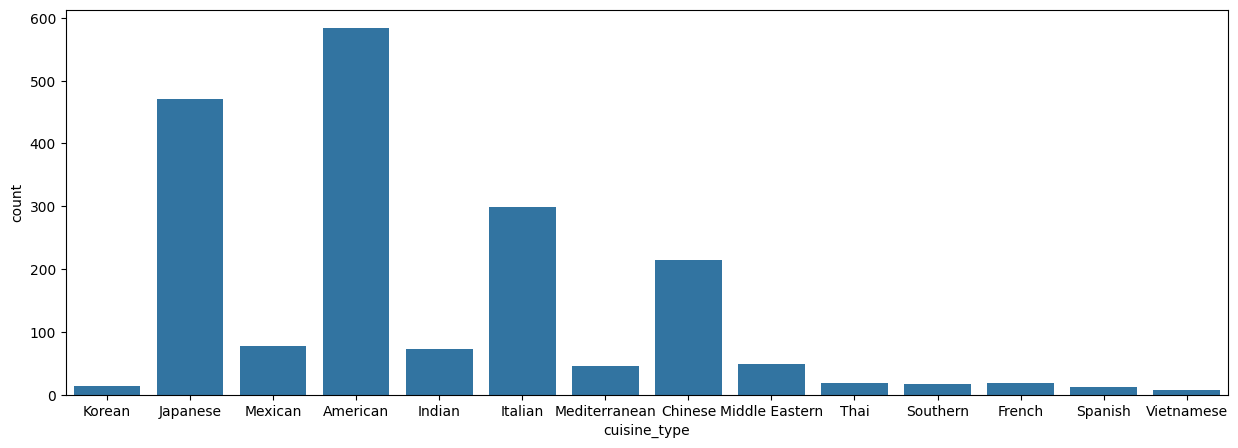

In [154]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.

#### Cost of the order

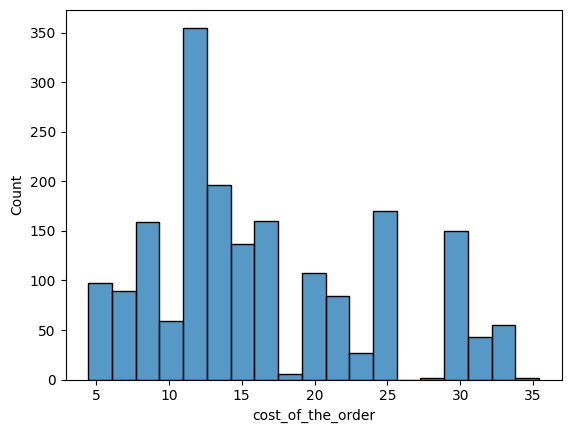

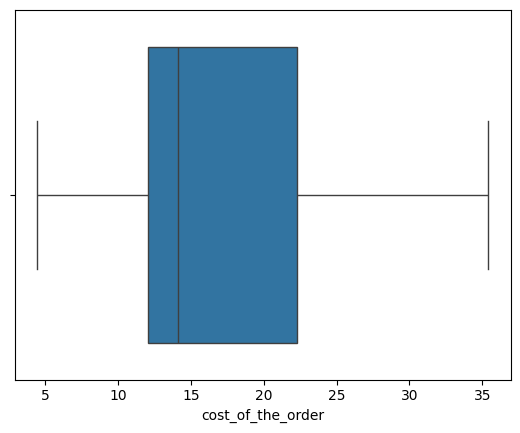

In [155]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

#### Day of the week

In [156]:
# Check the unique values
print(df['day_of_the_week'].unique())  # Complete the code to check unique values for the 'day_of_the_week' column


['Weekend' 'Weekday']


<Axes: xlabel='day_of_the_week', ylabel='count'>

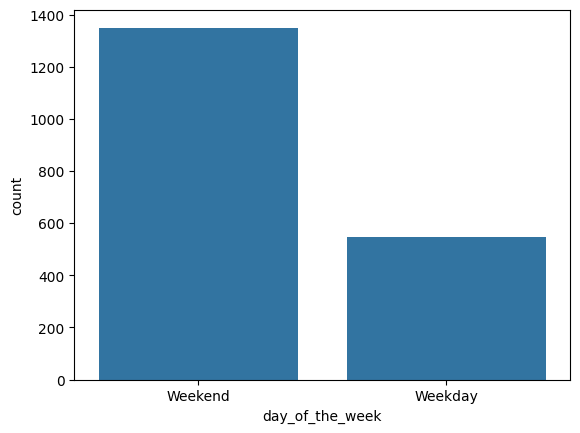

In [157]:
sns.countplot(data = df, x = 'day_of_the_week') ## Complete the code to plot a bar graph for 'day_of_the_week' column

#### Rating

In [158]:
# Check the unique values
print(df['rating'].unique()) ## Complete the code to check unique values for the 'rating' column

['Not given' '5' '3' '4']


<Axes: xlabel='rating', ylabel='count'>

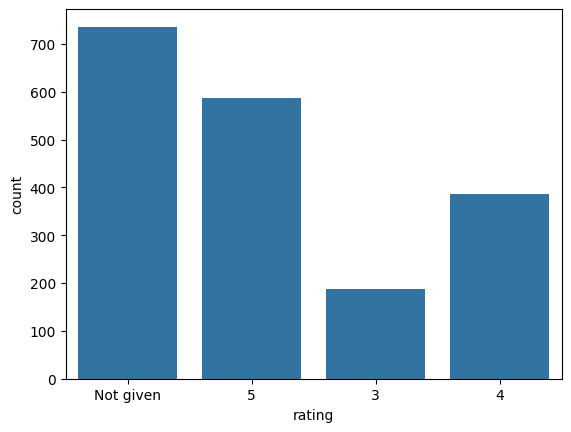

In [159]:
sns.countplot(data = df, x = 'rating') ## Complete the code to plot bar graph for 'rating' column

#### Food Preparation time

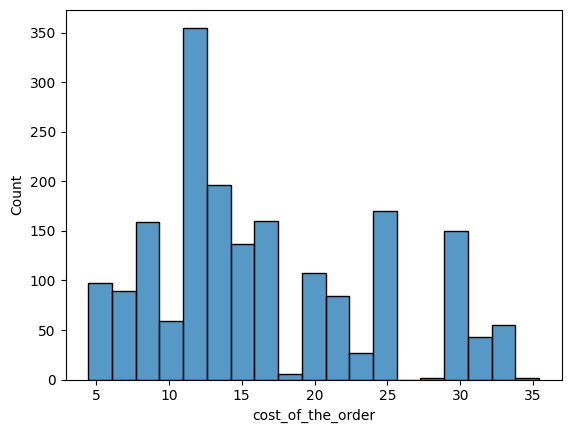

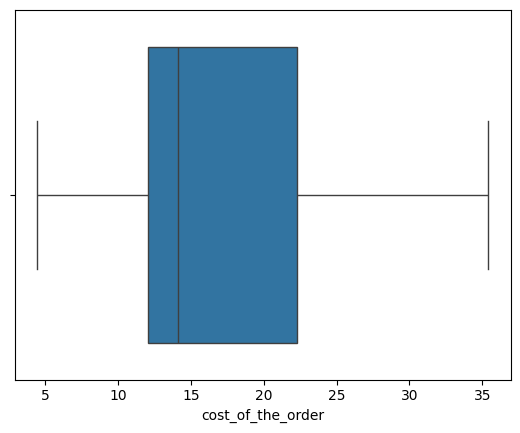

In [160]:
sns.histplot(data=df, x='cost_of_the_order') ## Complete the code to plot the histogram for the cost of order
plt.show()
sns.boxplot(data=df, x='cost_of_the_order') ## Complete the code to plot the boxplot for the cost of order
plt.show()

#### Delivery time

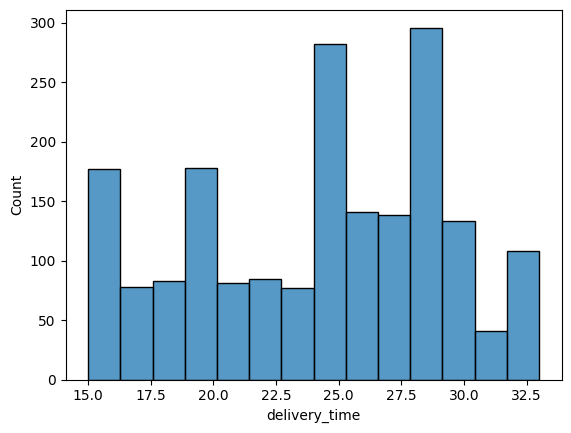

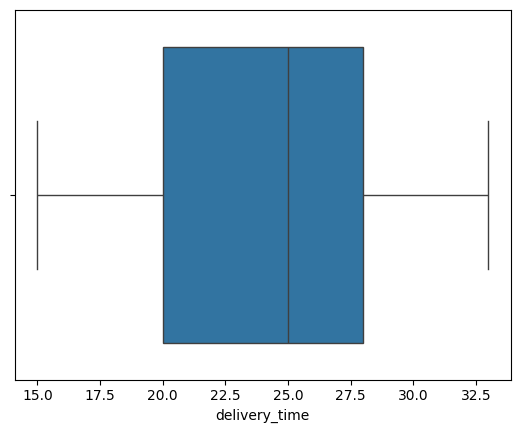

In [161]:
sns.histplot(data=df, x='delivery_time') ## Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df, x='delivery_time') ## Complete the code to plot the boxplot for the delivery time
plt.show()

### *Question 7:* Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [162]:
# Get top 5 restaurants with highest number of orders
top_5_restaurants = df['restaurant_name'].value_counts().head(5)
print(top_5_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


### *Question 8:* Which is the most popular cuisine on weekends? [1 mark]

In [163]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
most_popular_cuisine = df_weekend['cuisine_type'].value_counts().idxmax()
print("The most popular cuisine on weekends is:", most_popular_cuisine)

The most popular cuisine on weekends is: American


### *Question 9:* What percentage of the orders cost more than 20 dollars? [2 marks]


In [164]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order'] > 20]  # Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### *Question 10:* What is the mean order delivery time? [1 mark]

In [165]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  ## Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes



### *Question 11:* The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [166]:
#The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. 

# Get the counts of each customer_id
top_5_customers = df['customer_id'].value_counts().head(5)
print(top_5_customers)

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
Name: count, dtype: int64


### Multivariate Analysis

### *Question 12:* Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### Cuisine vs Cost of the order

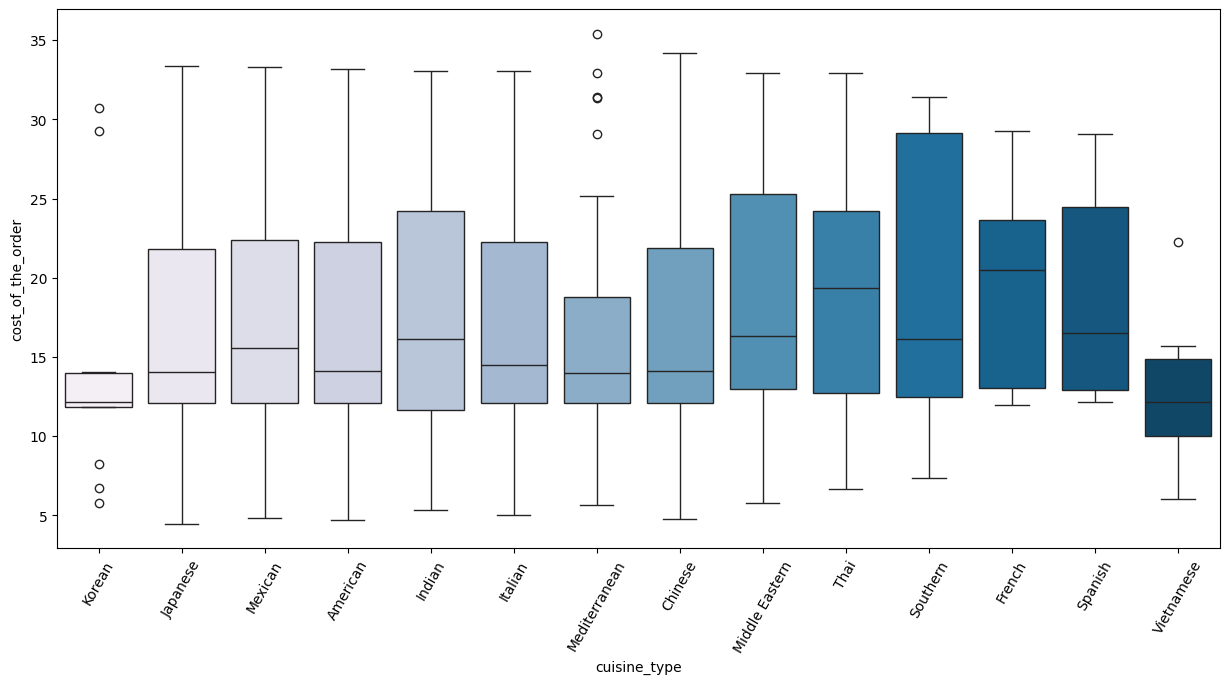

In [167]:
#Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)
# Relationship between cost of the order and cuisine type

plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

#### Cuisine vs Food Preparation time

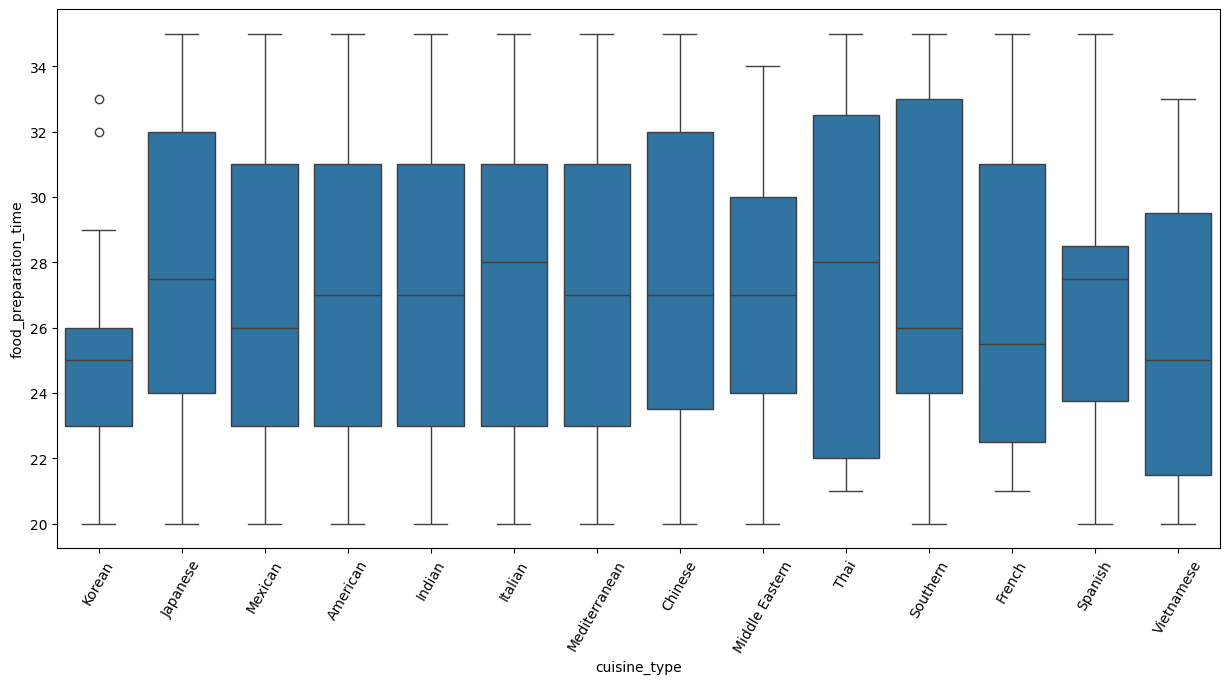

In [168]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

#### Day of the Week vs Delivery time

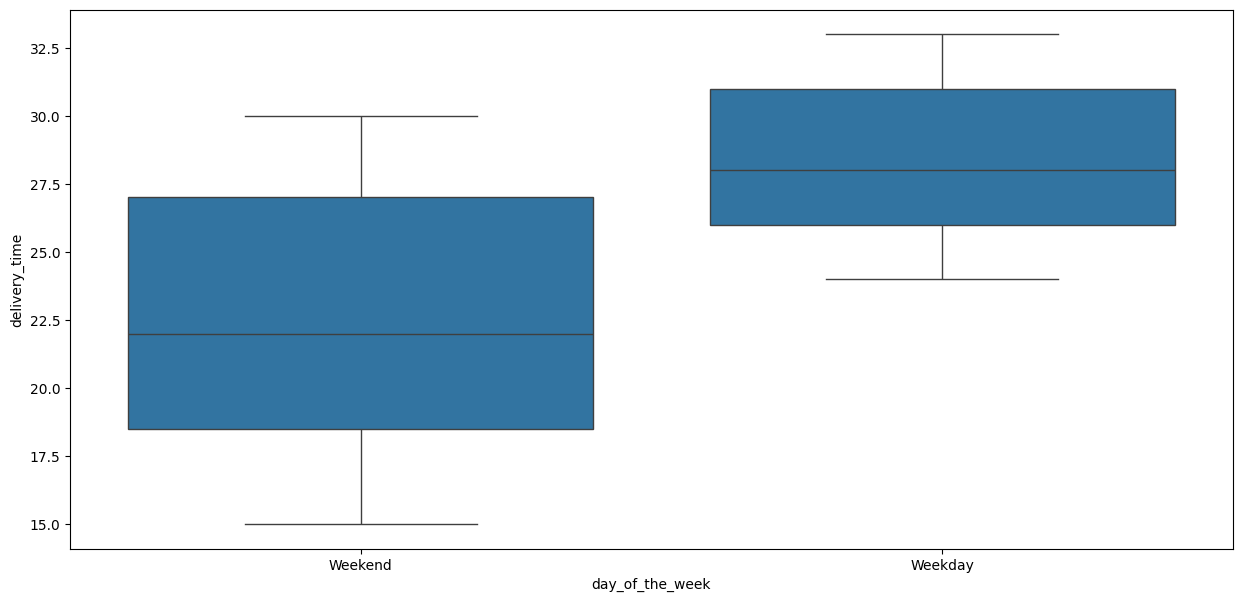

In [169]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [170]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                     3579.530
The Meatball Shop               2145.210
Blue Ribbon Sushi               1903.950
Blue Ribbon Fried Chicken       1662.290
Parm                            1112.760
RedFarm Broadway                 965.130
RedFarm Hudson                   921.210
TAO                              834.500
Han Dynasty                      755.290
Blue Ribbon Sushi Bar & Grill    666.620
Rubirosa                         660.450
Sushi of Gari 46                 640.870
Nobu Next Door                   623.670
Five Guys Burgers and Fries      506.470
Name: cost_of_the_order, dtype: float64

#### Rating vs Delivery time

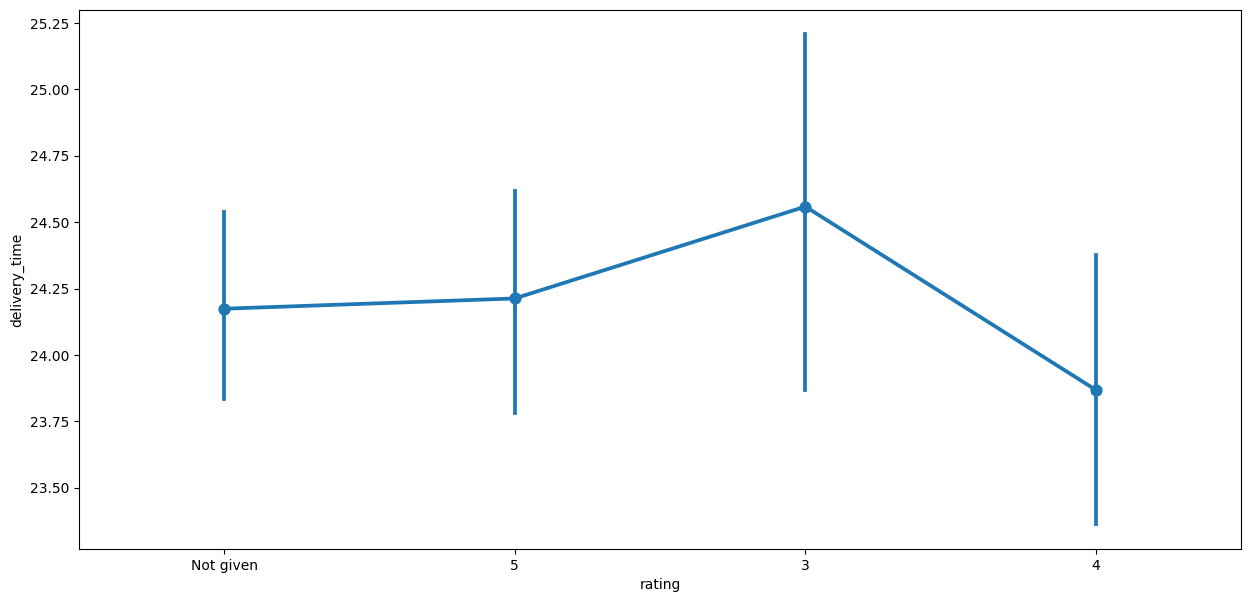

In [171]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Rating vs Food preparation time

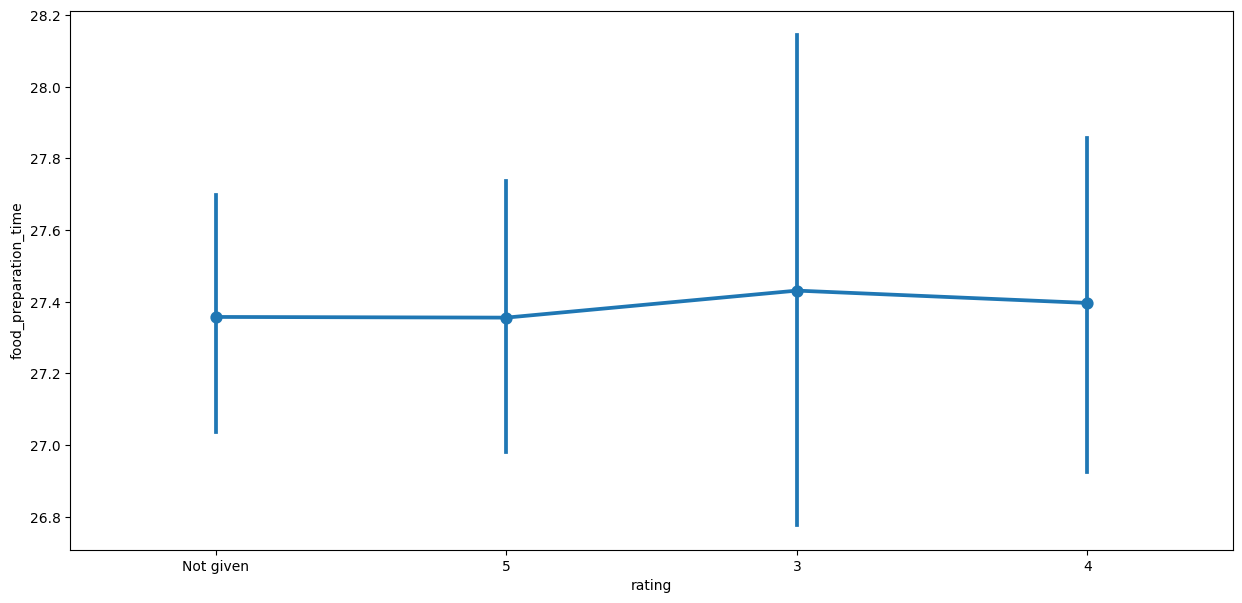

In [172]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='food_preparation_time', data=df)  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

#### Rating vs Cost of the order

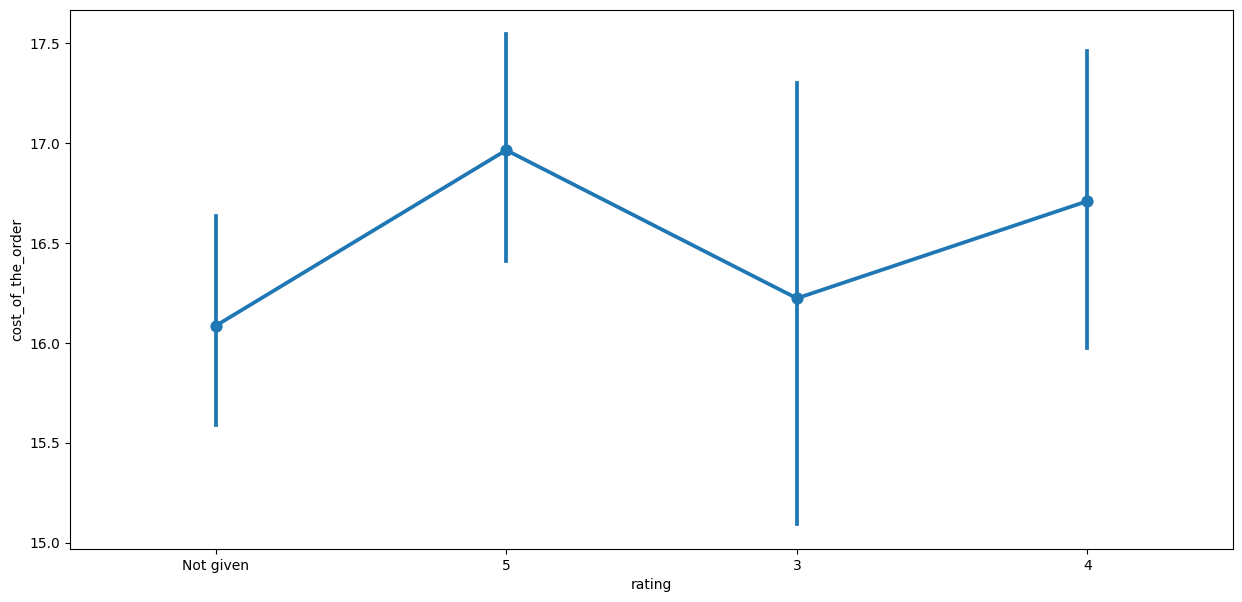

In [173]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='cost_of_the_order', data=df)   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

#### Correlation among variables

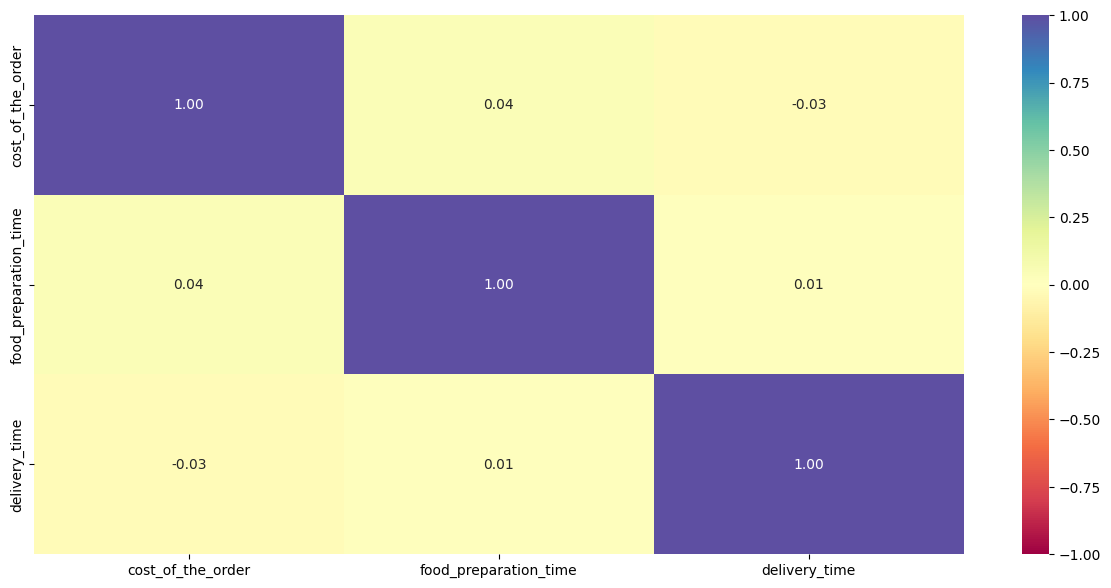

In [174]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### *Question 13:* The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [175]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [176]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50
# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4_rating = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating

# filter for average rating greater than 4
df_avg_rating_greater_than_4 = df_mean_4_rating[df_mean_4_rating['rating'] > 4].sort_values(by='rating', ascending=False).reset_index(drop=True)  ## Complete the code to find restaurants with rating > 4

df_avg_rating_greater_than_4

,restaurant_name,rating
0,The Meatball Shop,4.512
1,Blue Ribbon Fried Chicken,4.328
2,Shake Shack,4.278
3,Blue Ribbon Sushi,4.219


### *Question 14:* The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [177]:
### *Question 14:*The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the appropriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20,7.688
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,1.812
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,1.835
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15,7.300
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,1.738


In [178]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)[2 marks]


In [179]:
### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)[2 marks]
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Find the percentage of orders that have more than 60 minutes of total delivery time
orders_above_60 = df[df['total_time'] > 60]
percentage_above_60 = (orders_above_60.shape[0] / df.shape[0]) * 100

print("Percentage of orders that take more than 60 minutes to get delivered:", round(percentage_above_60, 2), '%')





Percentage of orders that take more than 60 minutes to get delivered: 10.54 %


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [180]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

# Get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')






The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


### Conclusion and Recommendations


### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

In [181]:
### Conclusions: 
#1. **Top Restaurants**: The top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm. These restaurants are highly popular among customers.

#2. **Popular Cuisine**: The most popular cuisine on weekends is American. This indicates a high demand for American cuisine during weekends.

#3. **Order Cost**: Approximately 29.24% of the orders cost more than 20 dollars. This suggests that a significant portion of the orders are relatively high-value.

#4. **Mean Delivery Time**: The mean delivery time for the orders is approximately 24.16 minutes. This provides an average benchmark for delivery performance.

#5. **Frequent Customers**: The top 5 most frequent customers have placed between 7 to 13 orders. These customers are highly engaged and could be targeted for loyalty programs.

#6. **Revenue Generation**: The net revenue generated by the company across all orders is around 6166.30 dollars. This revenue is derived from the commission charged on orders based on their cost.

#7. **Delivery Time Analysis**: About 10.54% of the orders take more than 60 minutes to get delivered from the time the order is placed. This indicates that a small but significant portion of orders experience longer delivery times.

#8. **Weekday vs Weekend Delivery Time**: The mean delivery time on weekdays is around 24 minutes, while on weekends it is also around 24 minutes. This shows that there is no significant difference in delivery times between weekdays and weekends.

#9. **Promotional Offer Eligibility**: The restaurants that fulfill the criteria for the promotional offer (rating count > 50 and average rating > 4) are The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi. These restaurants have consistently high ratings and customer satisfaction.

### Recommendations:

*  

In [182]:

### Recommendations:

#1. **Focus on Popular Restaurants**: The top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm. These restaurants should be given priority in promotional activities and partnerships to leverage their popularity.

#2. **Promote American Cuisine**: Since American cuisine is the most popular on weekends, consider promoting American cuisine restaurants more aggressively during weekends to attract more customers.

#3. **Loyalty Programs for Frequent Customers**: Implement loyalty programs for the top 5 most frequent customers who have placed between 7 to 13 orders. This can help in retaining these high-value customers and encouraging repeat orders.

#4. **Improve Delivery Times**: About 10.54% of the orders take more than 60 minutes to get delivered. Analyze the reasons for these delays and work on optimizing the delivery process to reduce the delivery time.

#5. **Weekend Promotions**: Since the mean delivery time on weekends is similar to weekdays, consider running special promotions during weekends to boost order volumes without compromising delivery efficiency.

#6. **Revenue Optimization**: The net revenue generated by the company is around 6166.30 dollars. Focus on increasing the number of high-value orders (above 20 dollars) as they contribute significantly to the revenue.

#7. **Promotional Offers for High-Rated Restaurants**: Provide promotional offers to restaurants with a rating count of more than 50 and an average rating greater than 4. This will encourage other restaurants to improve their service quality to qualify for such promotions.

#8. **Customer Feedback**: Encourage customers to rate their orders more frequently. This will provide more data for analysis and help in identifying areas for improvement.

#9. **Cuisine-Specific Promotions**: Use the insights from the cuisine vs. cost of the order and cuisine vs. food preparation time analysis to create targeted promotions for different cuisines, optimizing both customer satisfaction and operational efficiency.


In [183]:

# Calculate the total revenue generated by the top 5 restaurants
top_5_restaurant_names = top_5_restaurants.index
top_5_revenue = df[df['restaurant_name'].isin(top_5_restaurant_names)]['Revenue'].sum()

print('The total revenue generated by the top 5 restaurants is:', round(top_5_revenue, 2), 'dollars')
# Calculate the percentage of total revenue generated by the top 5 restaurants
percentage_top_5_revenue = (top_5_revenue / total_rev) * 100

print("Percentage of total revenue generated by the top 5 restaurants:", round(percentage_top_5_revenue, 2), '%')


The total revenue generated by the top 5 restaurants is: 2042.66 dollars
Percentage of total revenue generated by the top 5 restaurants: 33.13 %


In [184]:
### Problem Definition

###The problem at hand is to analyze the data of different food orders made by registered customers through the FoodHub app. 

###The goal is to gain insights into customer preferences, restaurant performance, and overall business metrics. 

###The analysis aims to answer key questions that will help the company improve its customer experience and business operations.

### Approach
"""
1. **Data Loading and Preparation**:
    - Import necessary libraries for data manipulation and visualization.
    - Load the dataset into a pandas DataFrame.
    - Inspect the data to understand its structure, including the number of rows and columns, data types, and missing values.

2. **Data Cleaning**:
    - Check for and handle missing values appropriately.
    - Ensure data types are correctly assigned for each column.

3. **Exploratory Data Analysis (EDA)**:
    - Perform univariate analysis to explore the distribution of individual variables using histograms, boxplots, and countplots.
    - Perform multivariate analysis to explore relationships between important variables using scatter plots, boxplots, and heatmaps.

4. **Key Questions and Analysis**:
    - Answer specific questions related to the dataset, such as:
      - Number of rows and columns.
      - Data types of different columns.
      - Presence of missing values.
      - Statistical summary of the data.
      - Number of orders not rated.
      - Top 5 restaurants in terms of the number of orders received.
      - Most popular cuisine on weekends.
      - Percentage of orders costing more than 20 dollars.
      - Mean order delivery time.
      - Top 5 most frequent customers.
      - Restaurants eligible for promotional offers based on rating criteria.
      - Net revenue generated by the company.
      - Percentage of orders taking more than 60 minutes to deliver.
      - Mean delivery time on weekdays vs. weekends.

5. **Conclusions and Recommendations**:
    - Summarize the findings from the analysis.
    - Provide actionable recommendations to improve business operations and customer satisfaction based on the insights gained.

By following this structured approach, we aim to derive meaningful insights from the data that can help FoodHub enhance its service quality and business performance.
"""

'\n1. **Data Loading and Preparation**:\n    - Import necessary libraries for data manipulation and visualization.\n    - Load the dataset into a pandas DataFrame.\n    - Inspect the data to understand its structure, including the number of rows and columns, data types, and missing values.\n\n2. **Data Cleaning**:\n    - Check for and handle missing values appropriately.\n    - Ensure data types are correctly assigned for each column.\n\n3. **Exploratory Data Analysis (EDA)**:\n    - Perform univariate analysis to explore the distribution of individual variables using histograms, boxplots, and countplots.\n    - Perform multivariate analysis to explore relationships between important variables using scatter plots, boxplots, and heatmaps.\n\n4. **Key Questions and Analysis**:\n    - Answer specific questions related to the dataset, such as:\n      - Number of rows and columns.\n      - Data types of different columns.\n      - Presence of missing values.\n      - Statistical summary of 

In [185]:

# Calculate the number of orders without ratings
orders_without_ratings = df[df['rating'] == 'Not given'].shape[0]

# Calculate the percentage of orders without ratings
percentage_without_ratings = (orders_without_ratings / df.shape[0]) * 100

print("Percentage of orders without ratings:", round(percentage_without_ratings, 2), '%')


Percentage of orders without ratings: 38.78 %


In [ ]:
## Executive Summary

### Objective:
The objective of this analysis is to provide insights into the demand for different restaurants based on the data of orders made by registered customers through the FoodHub app. The goal is to enhance customer experience and improve business operations by answering key questions related to customer preferences, restaurant performance, and overall business metrics.

### Key Findings:

1. **Top Restaurants**:
    - The top 5 restaurants in terms of the number of orders received are Shake Shack (219 orders), The Meatball Shop (132 orders), Blue Ribbon Sushi (119 orders), Blue Ribbon Fried Chicken (96 orders), and Parm (68 orders).
    - These restaurants are highly popular among customers and should be prioritized in promotional activities.

2. **Popular Cuisine**:
    - American cuisine is the most popular on weekends, indicating a high demand for this cuisine during weekends.
    - Promoting American cuisine restaurants more aggressively during weekends can attract more customers.

3. **Order Cost**:
    - Approximately 29.24% of the orders cost more than 20 dollars, suggesting that a significant portion of the orders are relatively high-value.
    - Focusing on increasing the number of high-value orders can significantly boost revenue.

4. **Mean Delivery Time**:
    - The mean delivery time for the orders is approximately 24.16 minutes, providing an average benchmark for delivery performance.
    - Analyzing and optimizing the delivery process can help reduce delivery times further.

5. **Frequent Customers**:
    - The top 5 most frequent customers have placed between 7 to 13 orders.
    - Implementing loyalty programs for these high-value customers can help in retaining them and encouraging repeat orders.

6. **Revenue Generation**:
    - The net revenue generated by the company across all orders is around 6166.30 dollars.
    - The top 5 restaurants contribute approximately 33.13% of the total revenue, highlighting their importance to the business.

7. **Delivery Time Analysis**:
    - About 10.54% of the orders take more than 60 minutes to get delivered from the time the order is placed.
    - Identifying and addressing the reasons for these delays can improve overall delivery performance.

8. **Weekday vs Weekend Delivery Time**:
    - The mean delivery time on weekdays is around 24 minutes, while on weekends it is also around 24 minutes.
    - There is no significant difference in delivery times between weekdays and weekends, indicating consistent delivery performance.

9. **Promotional Offer Eligibility**:
    - Restaurants that fulfill the criteria for the promotional offer (rating count > 50 and average rating > 4) are The Meatball Shop (4.512), Blue Ribbon Fried Chicken (4.328), Shake Shack (4.278), and Blue Ribbon Sushi (4.219).
    - These restaurants have consistently high ratings and customer satisfaction.

### Recommendations:

1. **Focus on Popular Restaurants**:
    - Prioritize the top 5 restaurants in promotional activities and partnerships to leverage their popularity.

2. **Promote American Cuisine**:
    - Aggressively promote American cuisine restaurants during weekends to attract more customers.

3. **Loyalty Programs for Frequent Customers**:
    - Implement loyalty programs for the top 5 most frequent customers to retain them and encourage repeat orders.

4. **Improve Delivery Times**:
    - Analyze the reasons for delays in orders taking more than 60 minutes and optimize the delivery process to reduce delivery times.

5. **Weekend Promotions**:
    - Run special promotions during weekends to boost order volumes without compromising delivery efficiency.

6. **Revenue Optimization**:
    - Focus on increasing the number of high-value orders (above 20 dollars) as they contribute significantly to the revenue.

7. **Promotional Offers for High-Rated Restaurants**:
    - Provide promotional offers to restaurants with a rating count of more than 50 and an average rating greater than 4 to encourage other restaurants to improve their service quality.

8. **Customer Feedback**:
    - Encourage customers to rate their orders more frequently to provide more data for analysis and help identify areas for improvement.

9. **Cuisine-Specific Promotions**:
    - Use insights from the cuisine vs. cost of the order and cuisine vs. food preparation time analysis to create targeted promotions for different cuisines, optimizing both customer satisfaction and operational efficiency.

By implementing these recommendations, FoodHub can enhance its service quality, improve customer satisfaction, and boost overall business performance.

In [ ]:
## Executive Summary

### Objective:
The objective of this analysis is to provide insights into the demand for different restaurants based on the data of orders made by registered customers through the FoodHub app. The goal is to enhance customer experience and improve business operations by answering key questions related to customer preferences, restaurant performance, and overall business metrics.

### Key Findings:

1. **Top Restaurants**:
    -
    - These restaurants are highly popular among customers and should be prioritized in promotional activities.

2. **Popular Cuisine**:
    - American cuisine is the most popular on weekends, indicating a high demand for this cuisine during weekends.
    - Promoting American cuisine restaurants more aggressively during weekends can attract more customers.

3. **Order Cost**:
    - Approximately 29.24% of the orders cost more than 20 dollars, suggesting that a significant portion of the orders are relatively high-value.
    - Focusing on increasing the number of high-value orders can significantly boost revenue.

4. **Mean Delivery Time**:
    - The mean delivery time for the orders is approximately 24.16 minutes, providing an average benchmark for delivery performance.
    - Analyzing and optimizing the delivery process can help reduce delivery times further.

5. **Frequent Customers**:
    - The top 5 most frequent customers have placed between 7 to 13 orders.
    - Implementing loyalty programs for these high-value customers can help in retaining them and encouraging repeat orders.

6. **Revenue Generation**:
    - The net revenue generated by the company across all orders is around 6166.30 dollars.
    - The top 5 restaurants contribute approximately 33.13% of the total revenue, highlighting their importance to the business.

7. **Delivery Time Analysis**:
    - About 10.54% of the orders take more than 60 minutes to get delivered from the time the order is placed.
    - Identifying and addressing the reasons for these delays can improve overall delivery performance.

8. **Weekday vs Weekend Delivery Time**:
    - The mean delivery time on weekdays is around 24 minutes, while on weekends it is also around 24 minutes.
    - There is no significant difference in delivery times between weekdays and weekends, indicating consistent delivery performance.

9. **Promotional Offer Eligibility**:
    - Restaurants that fulfill the criteria for the promotional offer (rating count > 50 and average rating > 4) are The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi.
    - These restaurants have consistently high ratings and customer satisfaction.

### Recommendations:

1. **Focus on Popular Restaurants**:
    - Prioritize the top 5 restaurants in promotional activities and partnerships to leverage their popularity.

2. **Promote American Cuisine**:
    - Aggressively promote American cuisine restaurants during weekends to attract more customers.

3. **Loyalty Programs for Frequent Customers**:
    - Implement loyalty programs for the top 5 most frequent customers to retain them and encourage repeat orders.

4. **Improve Delivery Times**:
    - Analyze the reasons for delays in orders taking more than 60 minutes and optimize the delivery process to reduce delivery times.

5. **Weekend Promotions**:
    - Run special promotions during weekends to boost order volumes without compromising delivery efficiency.

6. **Revenue Optimization**:
    - Focus on increasing the number of high-value orders (above 20 dollars) as they contribute significantly to the revenue.

7. **Promotional Offers for High-Rated Restaurants**:
    - Provide promotional offers to restaurants with a rating count of more than 50 and an average rating greater than 4 to encourage other restaurants to improve their service quality.

8. **Customer Feedback**:
    - Encourage customers to rate their orders more frequently to provide more data for analysis and help identify areas for improvement.

9. **Cuisine-Specific Promotions**:
    - Use insights from the cuisine vs. cost of the order and cuisine vs. food preparation time analysis to create targeted promotions for different cuisines, optimizing both customer satisfaction and operational efficiency.

By implementing these recommendations, FoodHub can enhance its service quality, improve customer satisfaction, and boost overall business performance.

---